<a href="https://colab.research.google.com/github/MuhammadIqbal233/Minggu2_PCVK/blob/main/Minggu6PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCVK MINGGU-6**

In [ ]:
from google.colab import drive

drive.mount('/content.drive')

Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [4]:
from google.colab import files

# Mengunggah gambar
uploaded = files.upload()


Saving girl.jpg to girl.jpg


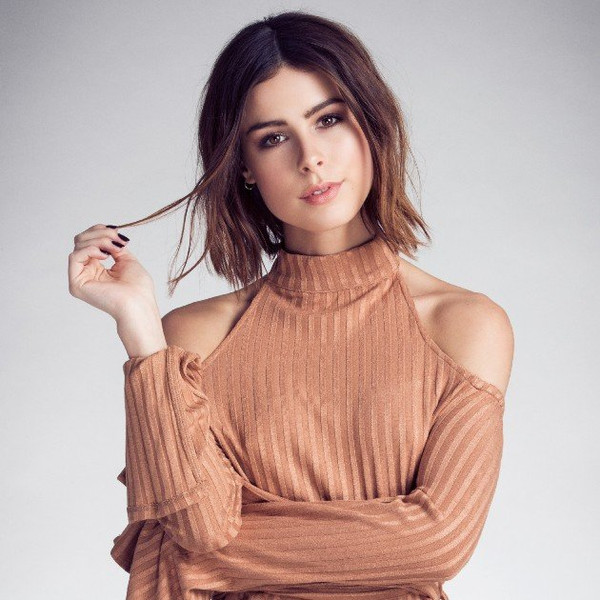

In [5]:
gambar = cv.imread('girl.jpg')
cv2_imshow(gambar)

<BarContainer object of 256 artists>

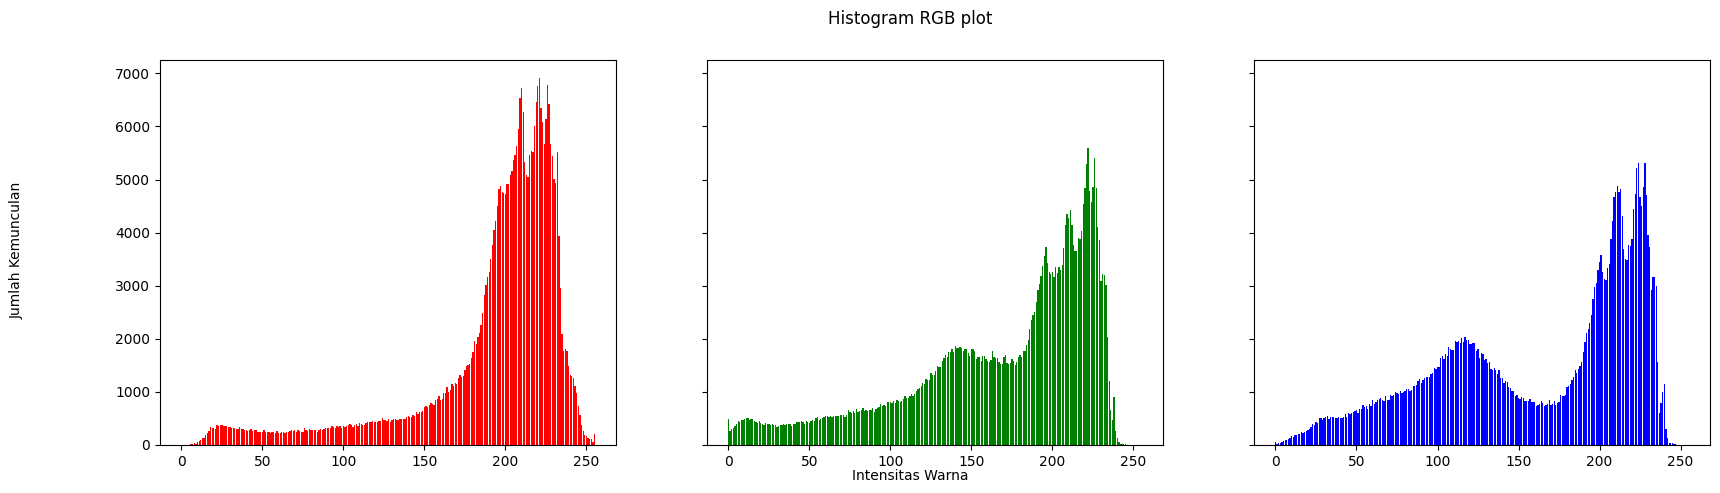

In [6]:
height, width, depth = np.shape(gambar)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[gambar[y][x][0]] += 1
    green[gambar[y][x][1]] += 1
    red[gambar[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


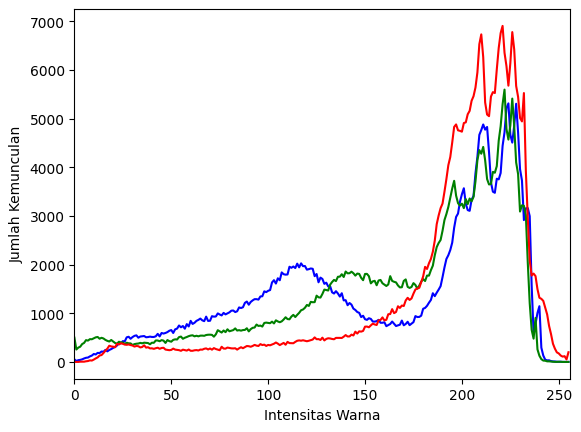

In [7]:

colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        gambar[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

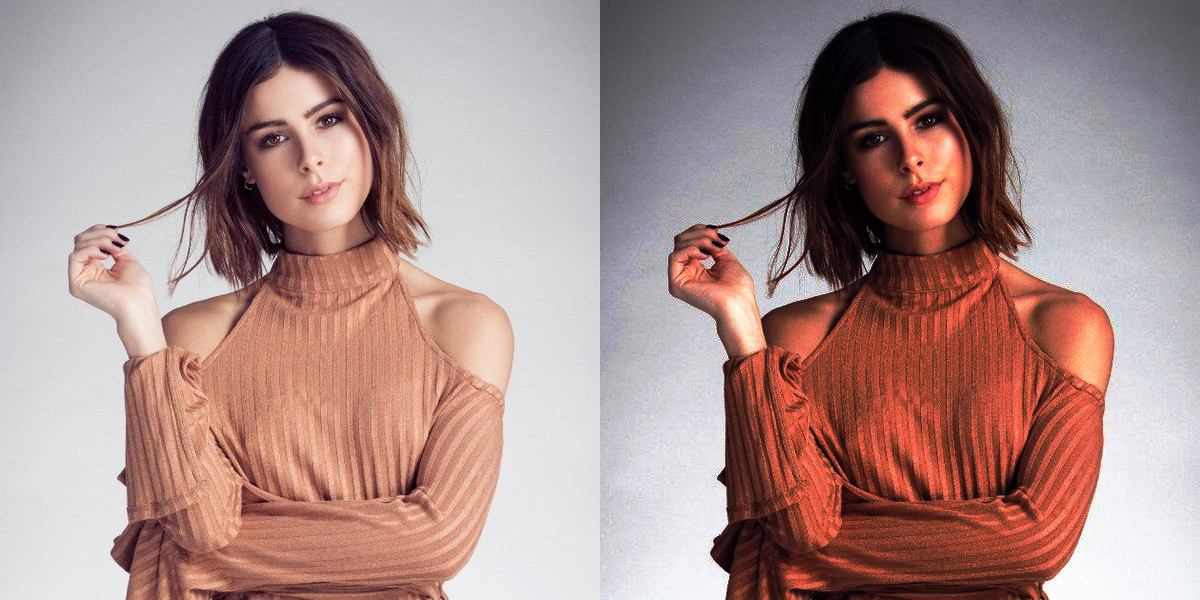

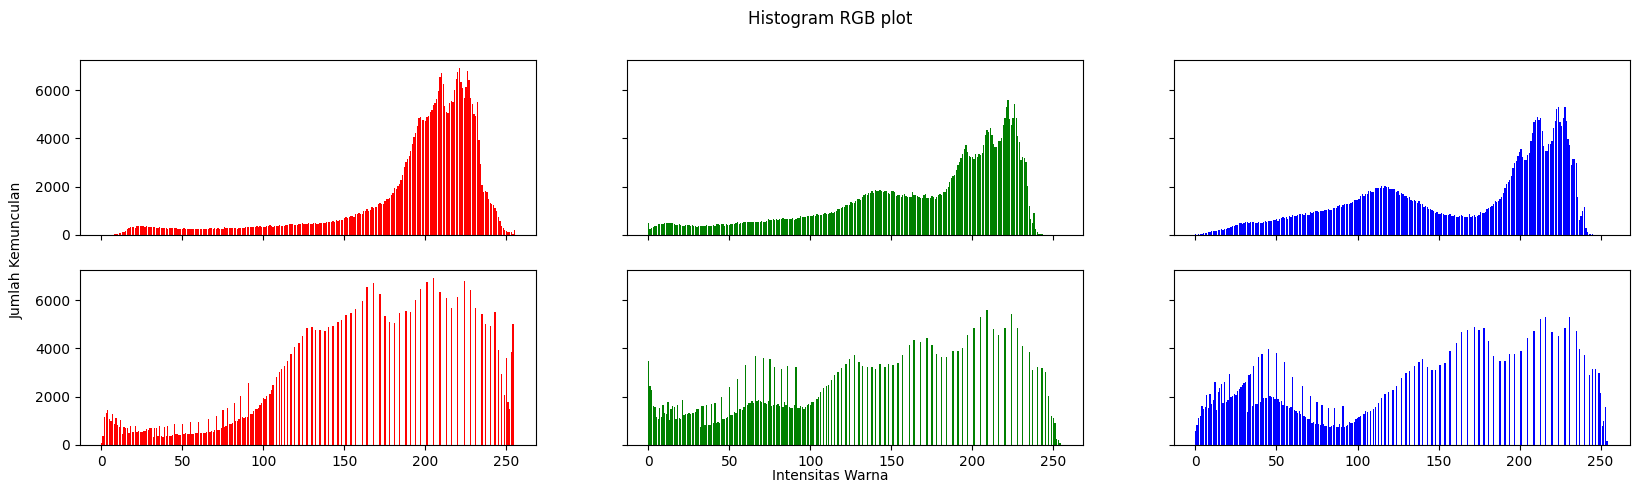

In [9]:
gambarx = plt.imread('girl.jpg')
gambar2 = cv.cvtColor(gambarx,cv.COLOR_BGR2RGB)

def histog(gambar2):
  height, width, depth = np.shape(gambar2)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][gambar2[y][x][0]] += 1
      ax[1][gambar2[y][x][1]] += 1
      ax[2][gambar2[y][x][2]] += 1
  return ax

histo_asli = histog(gambar2)

#convert to Numpy array
img_array = np.asarray(gambar2)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((gambar2, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


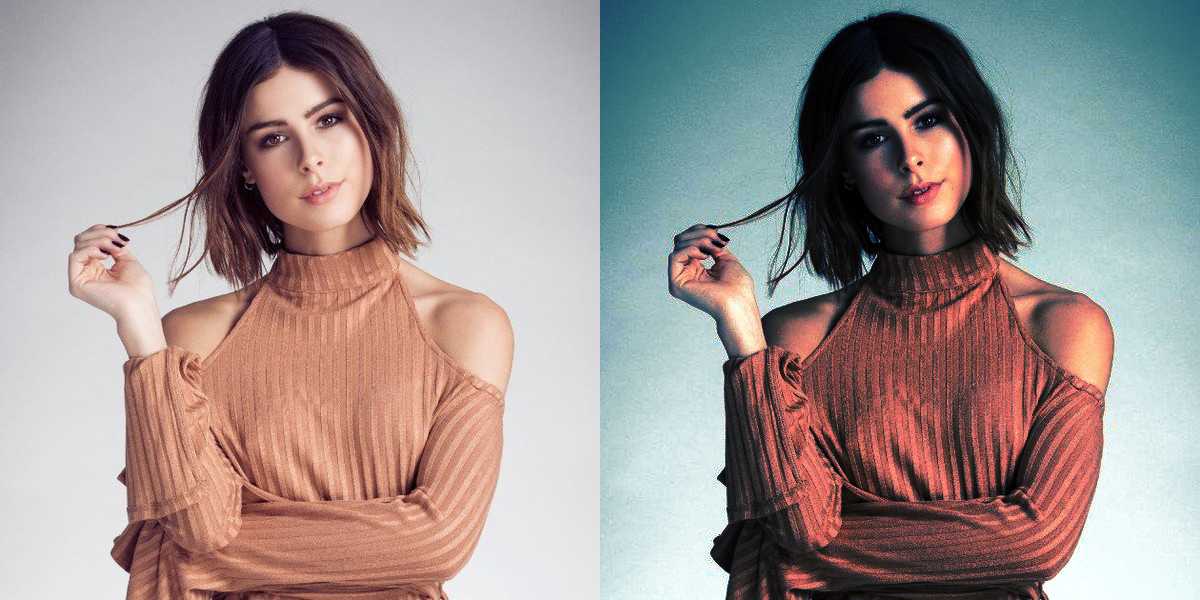

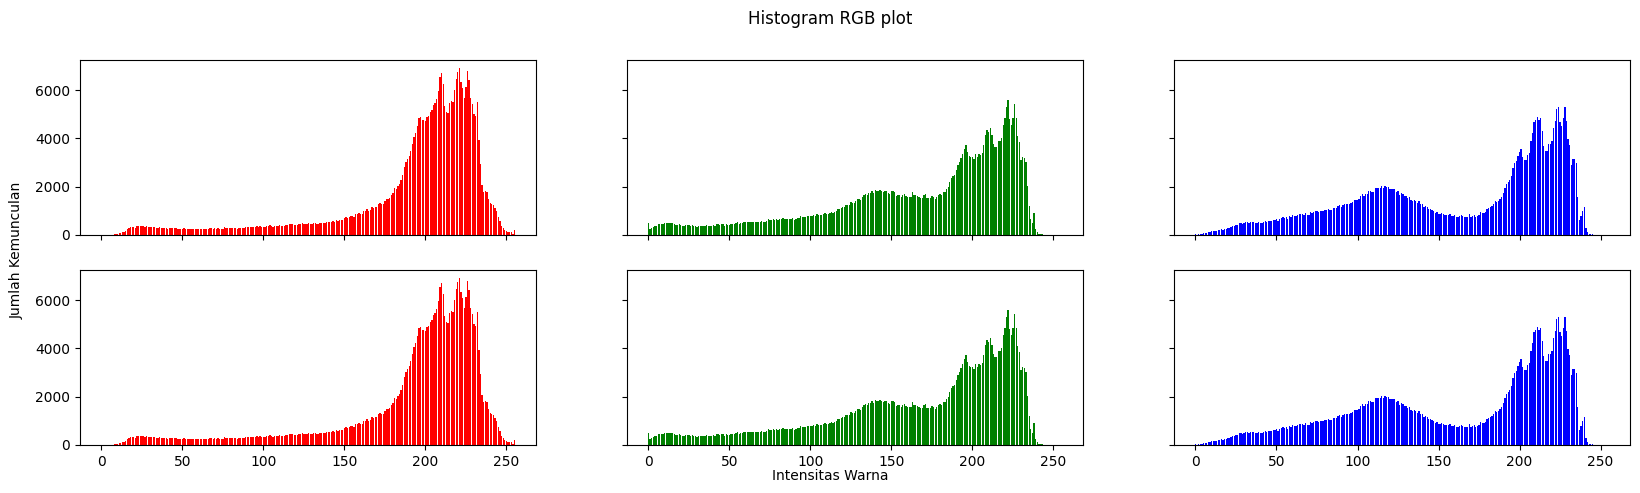

In [12]:
channels = cv.split(gambar2)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((gambar2, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


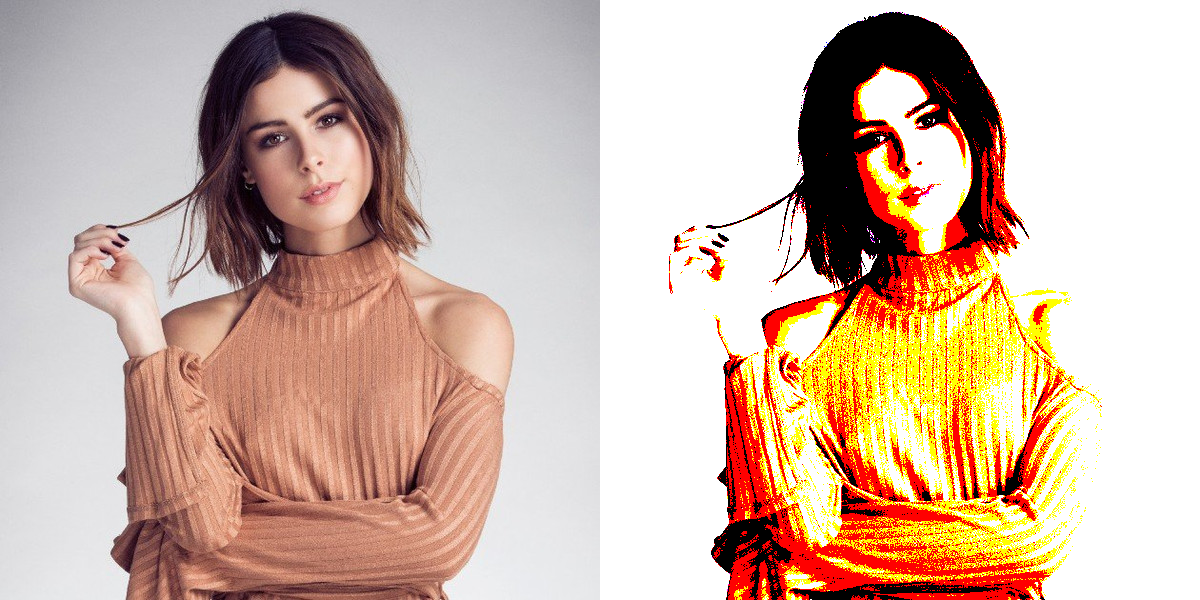

In [14]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

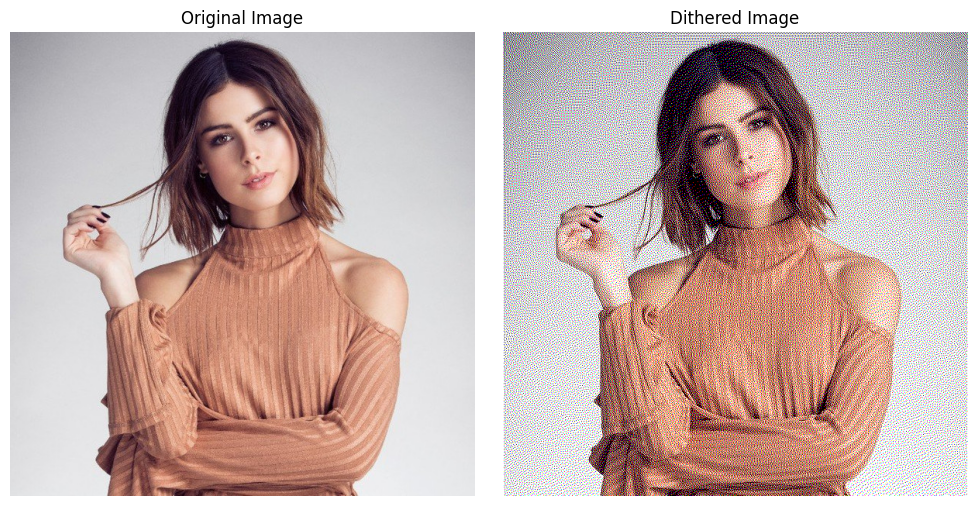

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

# Load the original input image
input_image_path = "girl.jpg"
input_image = Image.open(input_image_path)

# Apply dithering
output_image = apply_dithering(input_image)

# Plotting the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
gambaran2 = cv.cvtColor(gambar,cv.COLOR_BGR2RGB)
plt.imshow(gambaran2)
plt.title('Original Image')
plt.axis('off')

# Plot the dithered image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Display the images
# cv2_imshow(input_image_path)
plt.tight_layout()
plt.show()

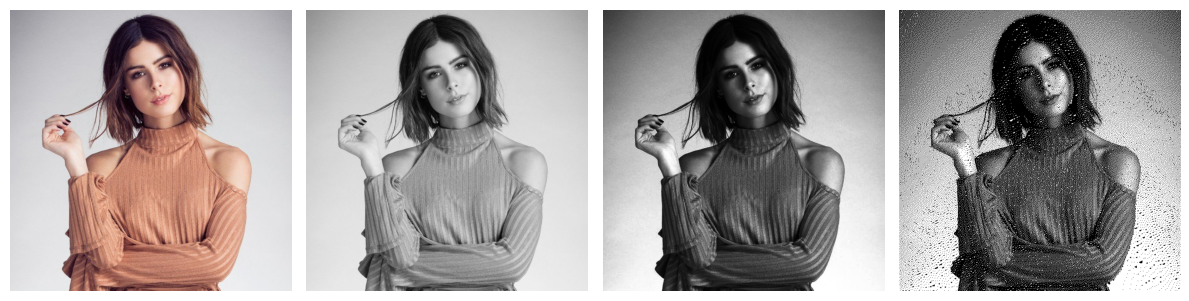

In [17]:
from cv2.gapi import equalizeHist
imgx = cv.imread('girl.jpg')
grayimg = cv.cvtColor(imgx, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(grayimg.copy())
def floyd_steinberg_dithering(dx):
    height, width = dx.shape
    for y in range(height):
        for x in range(width):
            old_pixel = dx[y, x]
            new_pixel = 255 if old_pixel > 128 else 0  # Nilai ambang batas
            dx[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < width - 1:
                dx[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                dx[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                dx[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                dx[y + 1, x + 1] += error * 1 / 16

    return dx
dithered = floyd_steinberg_dithering(equ.copy())

# menampilkan gambar

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(cv.cvtColor(imgx, cv.COLOR_BGR2RGB))
axes[1].imshow(cv.cvtColor(grayimg, cv.COLOR_BGR2RGB))
axes[2].imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))
axes[3].imshow(cv.cvtColor(dithered, cv.COLOR_BGR2RGB))

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()